### sklearn Classification 

- Dataset: iris.csv
- Learning Date: 1-Oct-23
- Learning from: Prasert Kanawattanachai (CBS)
    - Github: https://github.com/prasertcbs/

pip install sklearn

In [48]:
from platform import python_version
python_version()

'3.9.15'

In [49]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # C-Support Vector Classification
from sklearn.neighbors import KNeighborsClassifier # Classifier implement k-nearest neighbores vote
from sklearn.metrics import accuracy_score

%matplotlib inline
%config InlineBackend.figure_format = 'svg' # nlineBackend.figure_format = 'retina'

In [50]:
# load csv data to a dataframe

url = 'https://github.com/prasertcbs/basic-dataset/raw/master/iris.csv'

iris = pd.read_csv(url)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
iris.shape

(150, 5)

In [52]:
iris.dtypes # check data type

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [53]:
len(iris)

150

In [54]:
iris.isna().any() # check null data

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [55]:
iris.isna().sum() # check null data

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [56]:
iris.columns 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [57]:
iris['species'].unique() # check unique value in Species column

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [58]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [59]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [60]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
3,4.6,3.1,1.5,0.2,setosa
72,6.3,2.5,4.9,1.5,versicolor
79,5.7,2.6,3.5,1.0,versicolor
121,5.6,2.8,4.9,2.0,virginica
141,6.9,3.1,5.1,2.3,virginica
103,6.3,2.9,5.6,1.8,virginica
36,5.5,3.5,1.3,0.2,setosa
46,5.1,3.8,1.6,0.2,setosa
34,4.9,3.1,1.5,0.1,setosa
12,4.8,3.0,1.4,0.1,setosa


In [61]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [62]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

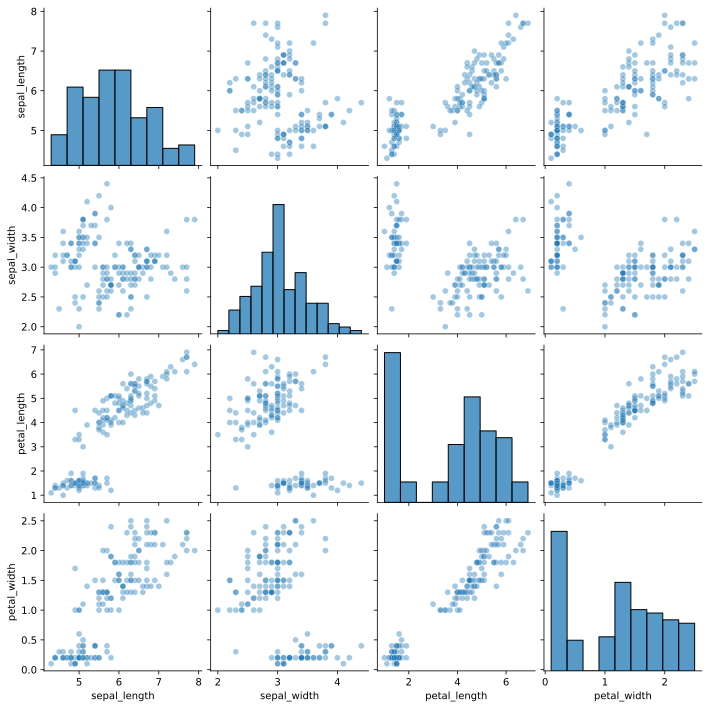

In [63]:
# plot data

sns.pairplot(iris, vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], plot_kws = {'alpha': 0.4})

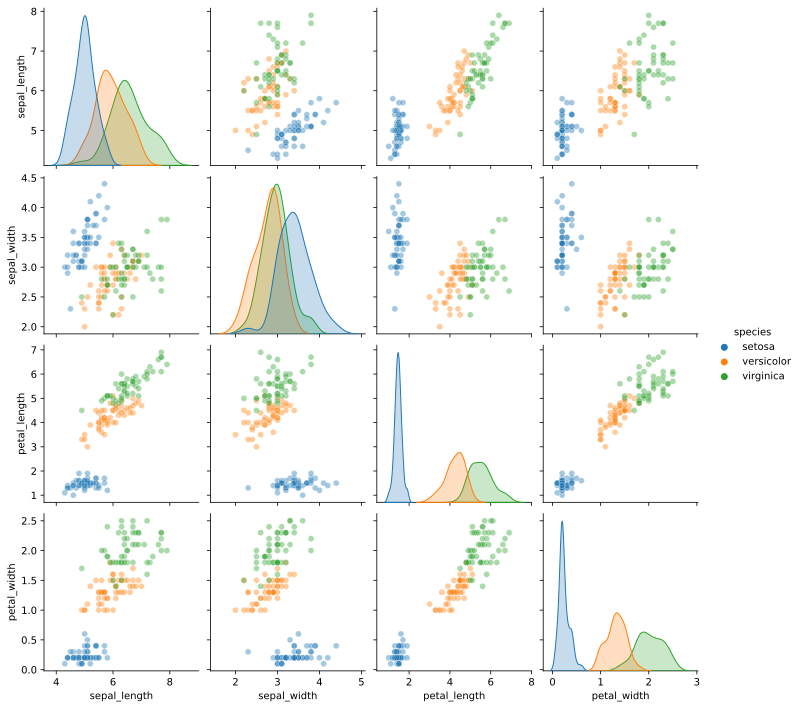

In [64]:
# plot data

sns.pairplot(iris, vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], hue = 'species', plot_kws = {'alpha': 0.4})

In [65]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Scikit-learn

In [66]:
# split input data/independent features/predictors and output data/dependent features/labels

X = iris.drop('species', axis = 1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [67]:
y = iris['species']
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [68]:
# split full data to train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [69]:
svc = SVC() # crate a model
svc.fit(X_train, y_train) # train the model
y_pred = svc.predict(X_test) # predict the model
accuracy_score(y_test, y_pred) # check the score 


1.0

In [70]:
# find the most important feature
from sklearn.inspection import permutation_importance

In [71]:
perm_importance = permutation_importance(svc, X_test, y_test)

In [72]:
perm_importance.importances_mean

array([0.00666667, 0.        , 0.66666667, 0.18      ])

In [73]:
sorted_idx = perm_importance.importances_mean.argsort() # sort the most important one

In [74]:
sorted_idx

array([1, 0, 3, 2])

In [75]:
# create a dataframe to do a visualize

df = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns = ['Value'])
df.head()

,Value
sepal_width,0.000000
sepal_length,0.006667
petal_width,0.180000
petal_length,0.666667


<AxesSubplot: >

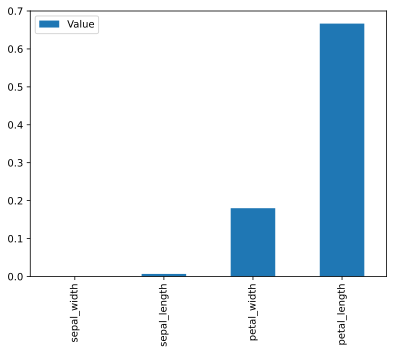

In [76]:
df.plot.bar()

In [77]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<AxesSubplot: xlabel='petal_length', ylabel='petal_width'>

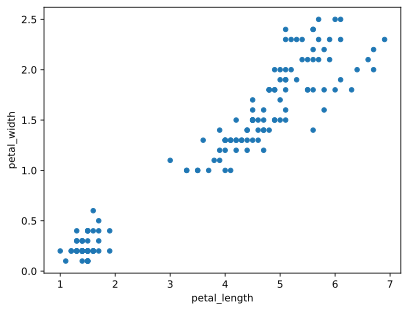

In [78]:
iris.plot.scatter(x = 'petal_length', y = 'petal_width')

In [79]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [80]:
color_map = {'setosa': 'b', 'versicolor': 'r', 'virginica': 'y'} # use dictionary and take the names
colors = iris['species'].apply(lambda x: color_map[x]) # make a serie to take data and take this species, dp apply, do lambda fn 

In [81]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot: xlabel='petal_length', ylabel='petal_width'>

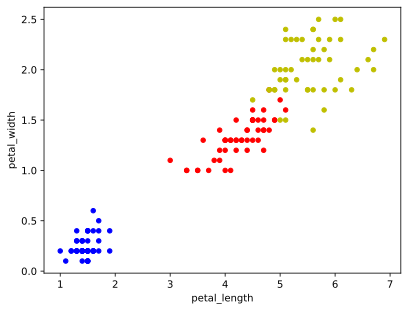

In [82]:
iris.plot.scatter(x = 'petal_length', y = 'petal_width', c = colors)

In [83]:
# use KNeighborsClassifier model

kn = KNeighborsClassifier(n_neighbors=5) # create a model
kn.fit(X_train, y_train) # train a model
y_pred = kn.predict(X_test) # predict a model
accuracy_score(y_test, y_pred) # check accuracy

1.0

In [84]:
perm_importance = permutation_importance(kn, X_test, y_test)

In [85]:
perm_importance.importances_mean

array([0.00666667, 0.00666667, 0.56      , 0.18      ])

In [86]:
sorted_idx = perm_importance.importances_mean.argsort() # sort of which one is the most important
sorted_idx

array([0, 1, 3, 2])

In [87]:
df = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
df.head()

,Value
sepal_length,0.006667
sepal_width,0.006667
petal_width,0.180000
petal_length,0.560000


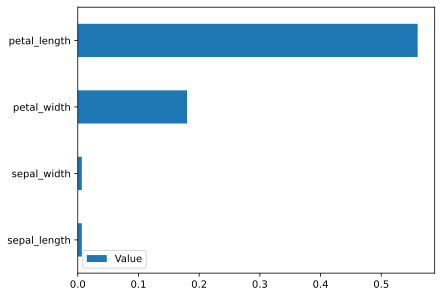

In [88]:
df.plot.barh();

### Calculate scores

In [89]:
kn.score(X_train, y_train)

0.9666666666666667

In [90]:
kn.score(X_test, y_test)

1.0

In [91]:
kn.predict([[3, 4, 5, 6]])

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['virginica'], dtype=object)

In [92]:
kn.predict([[5, 3, 1.2, 0.3], [5, 3, 1.2, 2], [6.5, 3, 5, 2]])

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa', 'setosa', 'virginica'], dtype=object)